In [ ]:
#!pip install pandas numpy matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable


In [9]:
df = pd.read_csv(r'C:\Users\Rana\Desktop\Tools-Final-Project\heart.csv')


In [10]:
#shows first rows
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [11]:
# shape of the dataset
df.shape

(1025, 14)

In [14]:
# Datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [16]:
# Describe Numerical and Categorical
print(df.describe(include='all').T)

           count        mean        std    min    25%    50%    75%    max
age       1025.0   54.434146   9.072290   29.0   48.0   56.0   61.0   77.0
sex       1025.0    0.695610   0.460373    0.0    0.0    1.0    1.0    1.0
cp        1025.0    0.942439   1.029641    0.0    0.0    1.0    2.0    3.0
trestbps  1025.0  131.611707  17.516718   94.0  120.0  130.0  140.0  200.0
chol      1025.0  246.000000  51.592510  126.0  211.0  240.0  275.0  564.0
fbs       1025.0    0.149268   0.356527    0.0    0.0    0.0    0.0    1.0
restecg   1025.0    0.529756   0.527878    0.0    0.0    1.0    1.0    2.0
thalach   1025.0  149.114146  23.005724   71.0  132.0  152.0  166.0  202.0
exang     1025.0    0.336585   0.472772    0.0    0.0    0.0    1.0    1.0
oldpeak   1025.0    1.071512   1.175053    0.0    0.0    0.8    1.8    6.2
slope     1025.0    1.385366   0.617755    0.0    1.0    1.0    2.0    2.0
ca        1025.0    0.754146   1.030798    0.0    0.0    0.0    1.0    4.0
thal      1025.0    2.323

In [18]:
# LIST OF VARIABLES + TYPES
print("Variables and Datatypes")
print(df.dtypes)

Variables and Datatypes
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [19]:
#Check missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [20]:
#Detect duplicates
print("Duplicates:\n", df.duplicated().sum())

Duplicates:
 723


In [21]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [22]:
#Remove Extra spaces and First letter capitalize
df = df.apply(lambda x: x.str.strip().str.title() if x.dtype == "object" else x)


In [23]:
#Automatic detection of categorical columns (even if numeric)
cat_cols = [col for col in df.columns if df[col].nunique() <= 10 and df[col].dtype in ['int64','float64']]
num_cols = [col for col in df.columns if col not in cat_cols]
print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)

Categorical columns: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Numerical columns: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


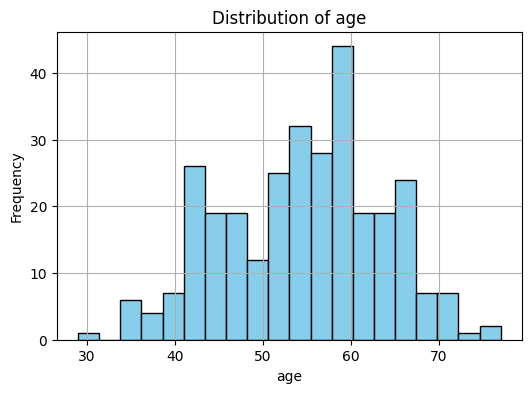

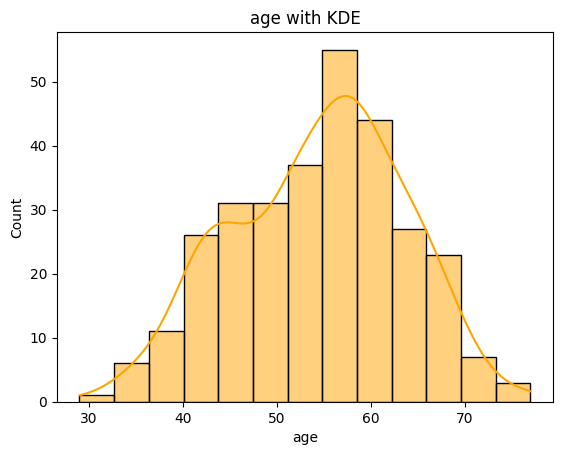

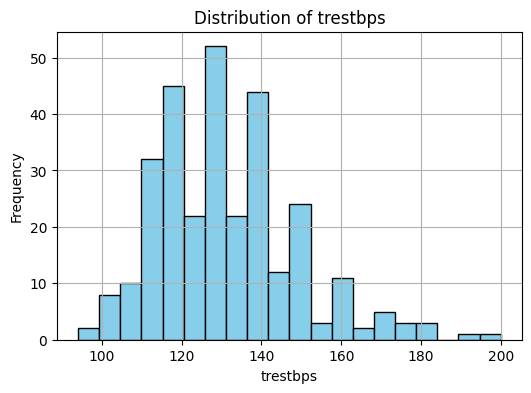

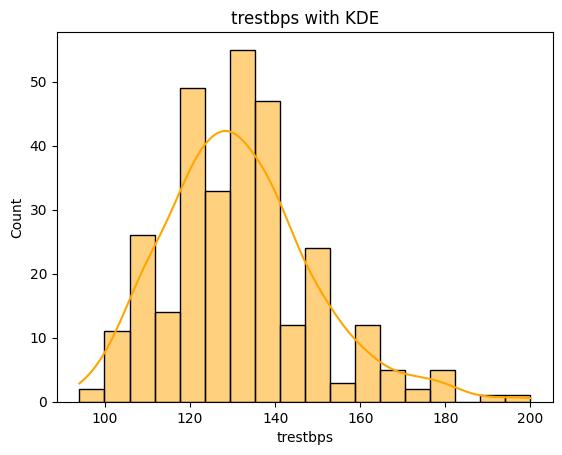

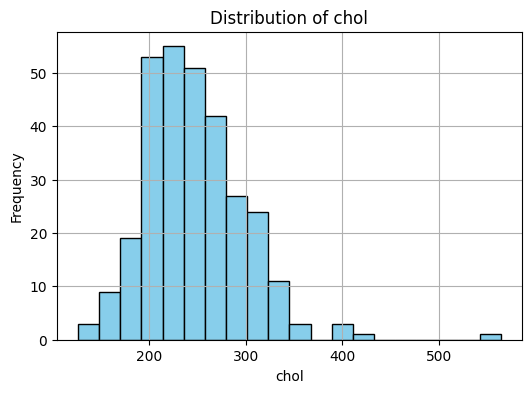

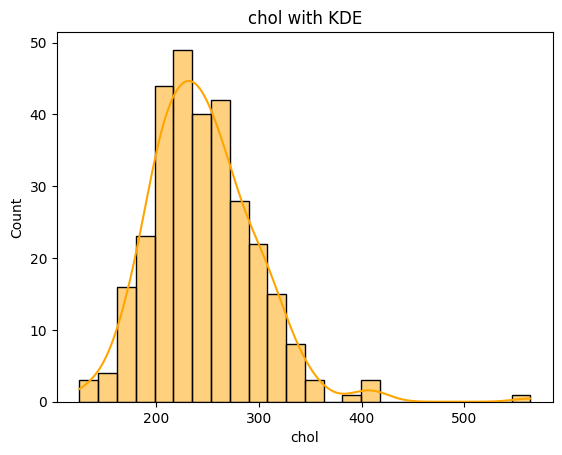

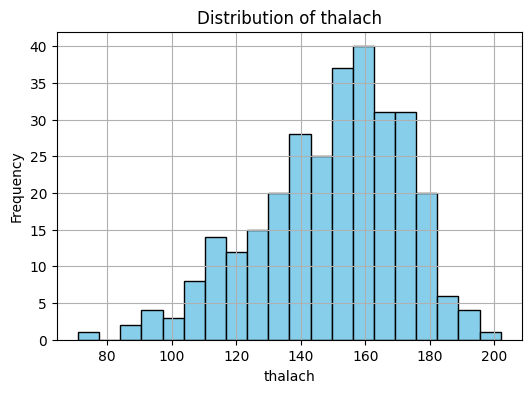

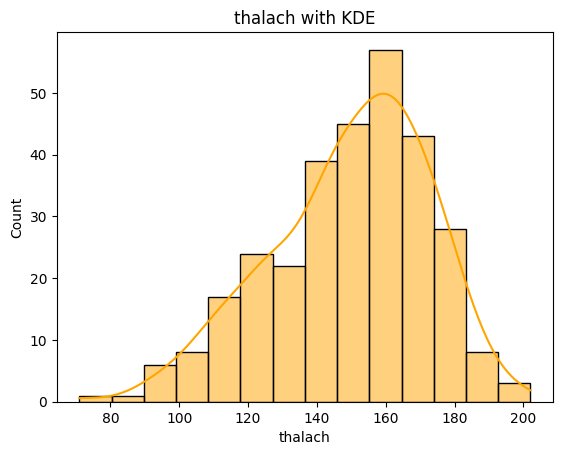

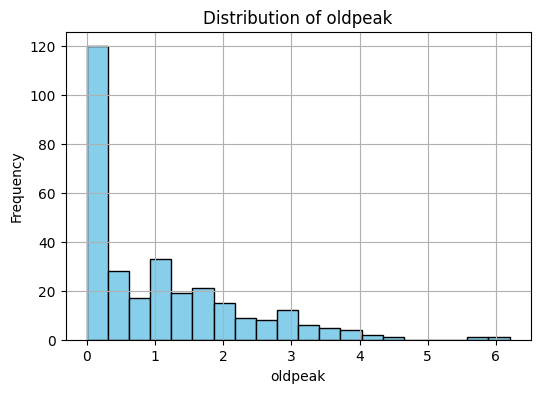

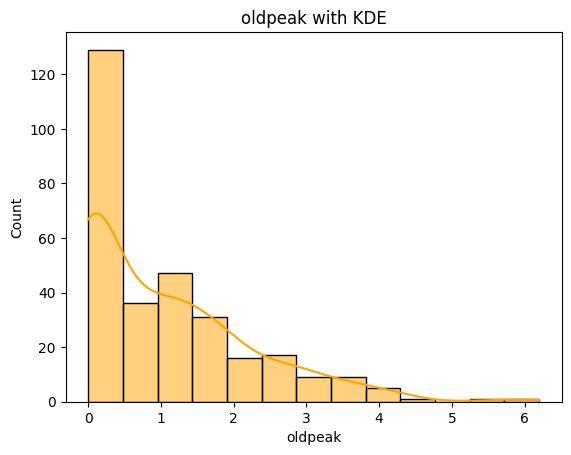

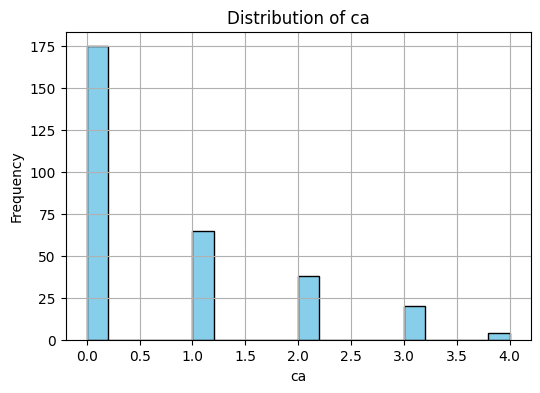

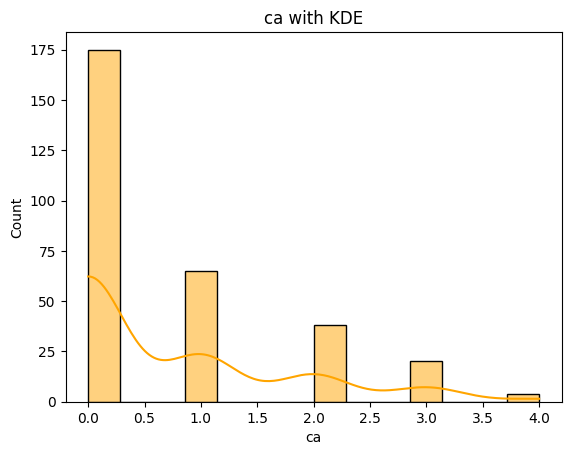

In [26]:
#Numerical Columns
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

for col in num_cols:
    plt.figure(figsize=(6,4))
    df[col].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

    # KDE plot
    sns.histplot(df[col], kde=True, color='orange')
    plt.title(f"{col} with KDE")
    plt.show()


In [ ]:
#Numerical vs Numerical
fig, axes = plt.subplots(1, 2, figsize=(9, 4)) # Adjusted figsize for better visibility

sns.scatterplot(x='age', y='thalach', hue='target', data=df, ax=axes[0])
axes[0].set_title("Age vs Max Heart Rate by Target")

sns.scatterplot(x='chol', y='trestbps', hue='target', data=df, ax=axes[1])
axes[1].set_title("Cholesterol vs Resting BP by Target")

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

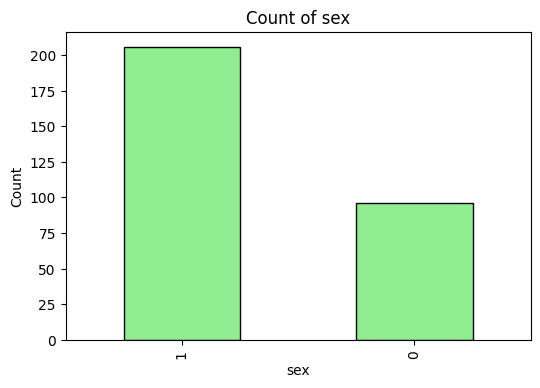

C:\Users\Rana\AppData\Local\Temp\ipykernel_15688\3053738357.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


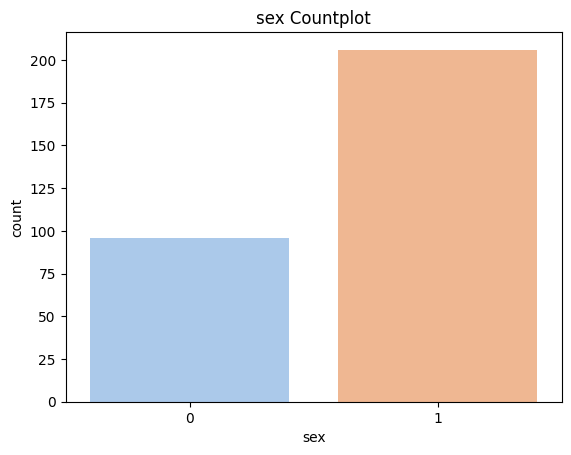

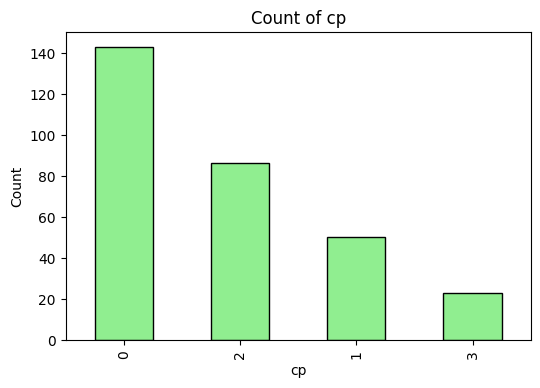

C:\Users\Rana\AppData\Local\Temp\ipykernel_15688\3053738357.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


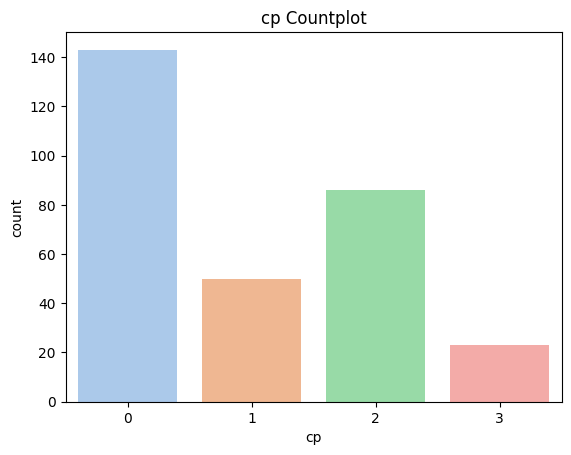

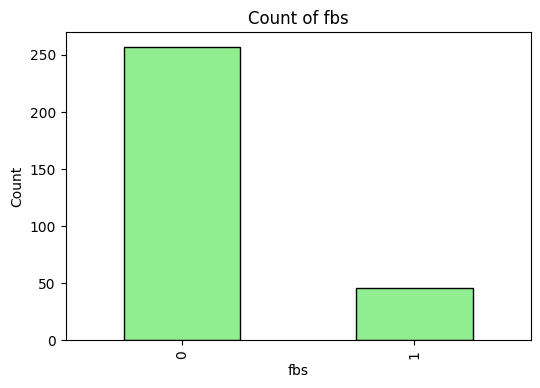

C:\Users\Rana\AppData\Local\Temp\ipykernel_15688\3053738357.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


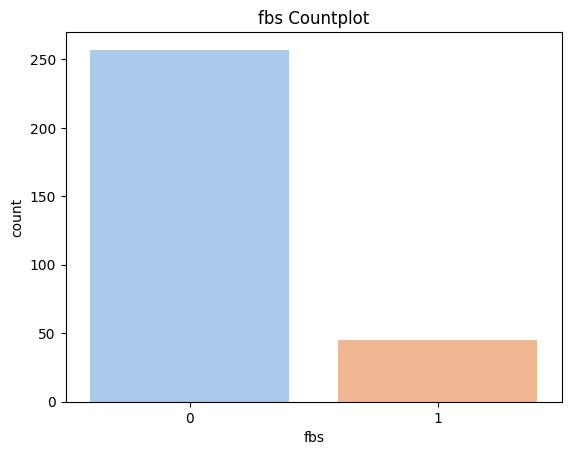

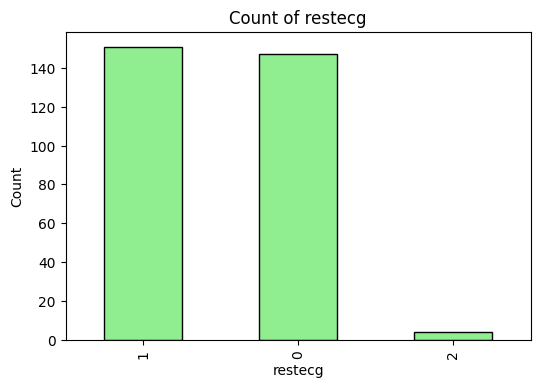

C:\Users\Rana\AppData\Local\Temp\ipykernel_15688\3053738357.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


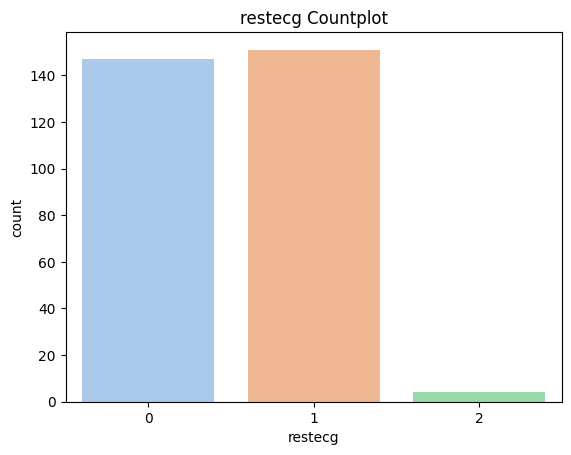

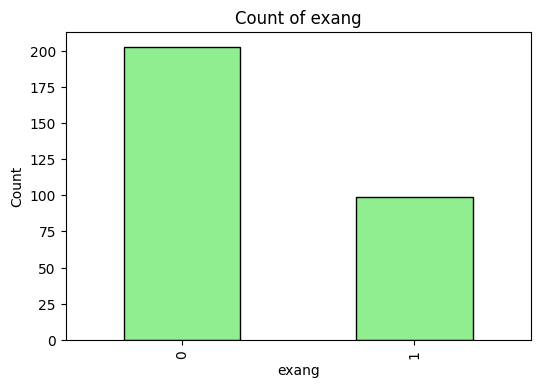

C:\Users\Rana\AppData\Local\Temp\ipykernel_15688\3053738357.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


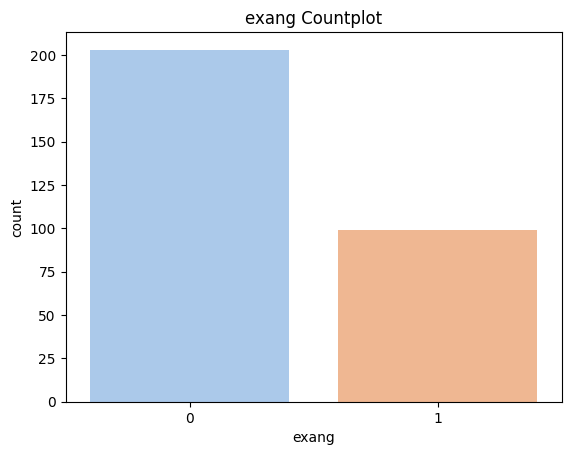

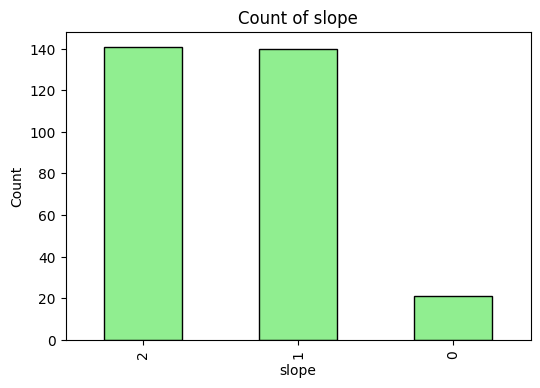

C:\Users\Rana\AppData\Local\Temp\ipykernel_15688\3053738357.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


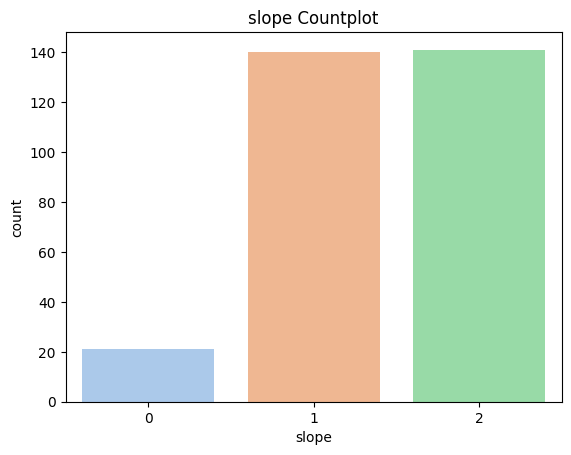

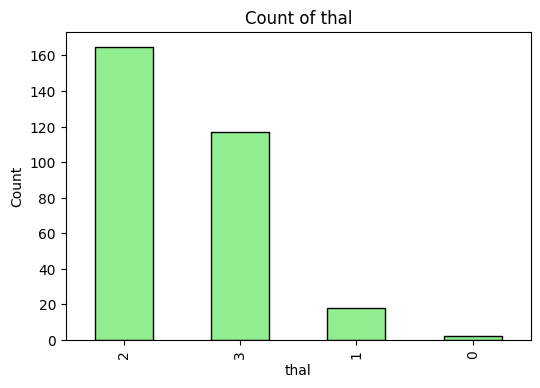

C:\Users\Rana\AppData\Local\Temp\ipykernel_15688\3053738357.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


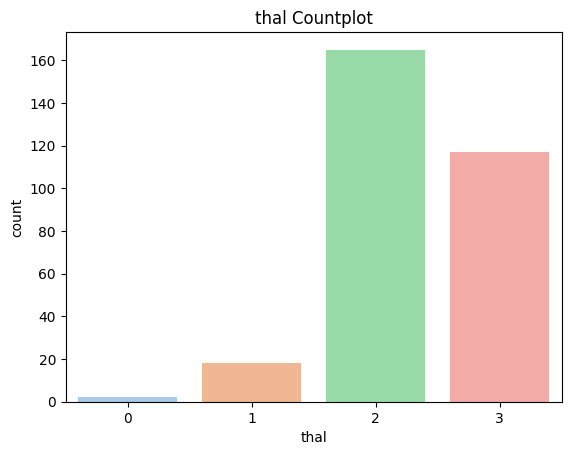

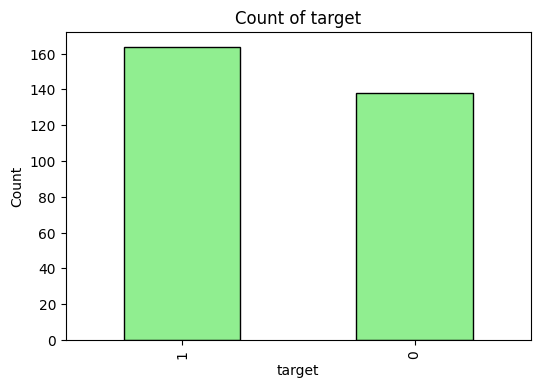

C:\Users\Rana\AppData\Local\Temp\ipykernel_15688\3053738357.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


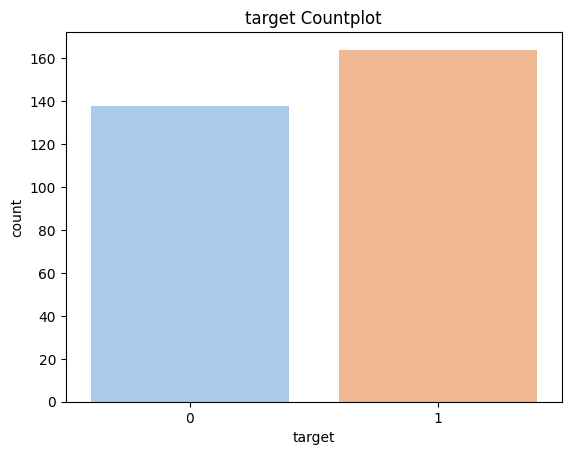

In [25]:
#categorical column
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'target']

for col in cat_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

    # Seaborn countplot
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f"{col} Countplot")
    plt.show()

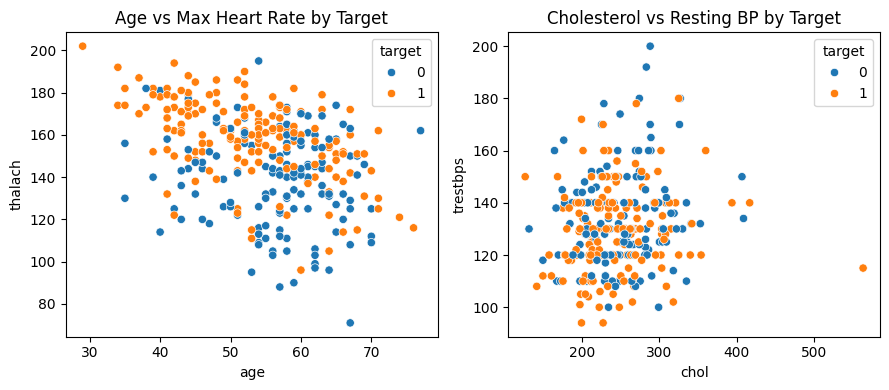

In [27]:
#Numerical vs Numerical
fig, axes = plt.subplots(1, 2, figsize=(9, 4)) # Adjusted figsize for better visibility

sns.scatterplot(x='age', y='thalach', hue='target', data=df, ax=axes[0])
axes[0].set_title("Age vs Max Heart Rate by Target")

sns.scatterplot(x='chol', y='trestbps', hue='target', data=df, ax=axes[1])
axes[1].set_title("Cholesterol vs Resting BP by Target")

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

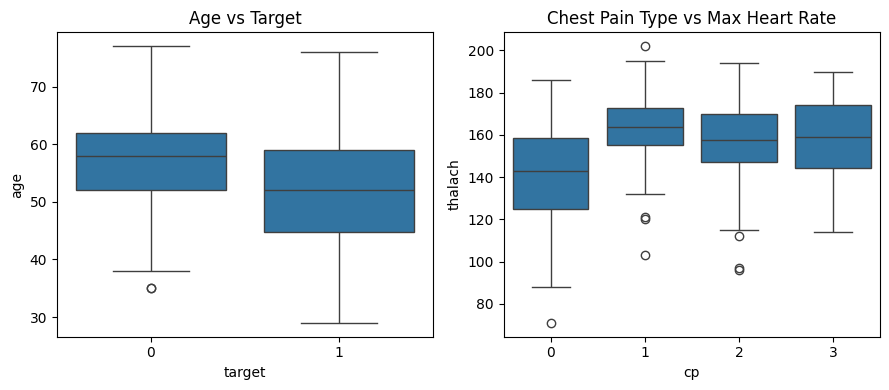

In [28]:
#Numerical vs Categorical
fig, axes = plt.subplots(1, 2, figsize=(9, 4))  # 1 row, 2 columns

# First boxplot
sns.boxplot(x='target', y='age', data=df, ax=axes[0])
axes[0].set_title("Age vs Target")

# Second boxplot
sns.boxplot(x='cp', y='thalach', data=df, ax=axes[1])
axes[1].set_title("Chest Pain Type vs Max Heart Rate")

plt.tight_layout()  # automatically adjusts spacing
plt.show()

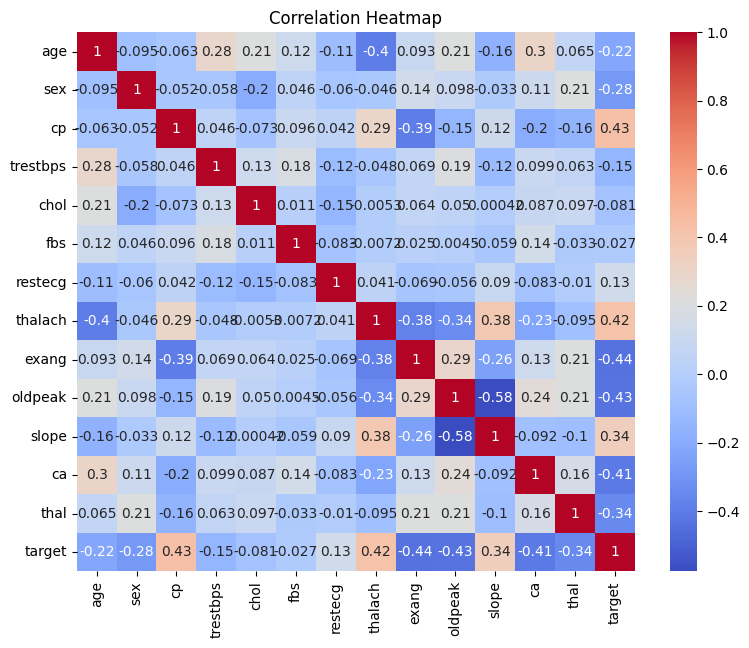

In [29]:
#To check Multicollinearity
corr = df.corr(numeric_only=True)
plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

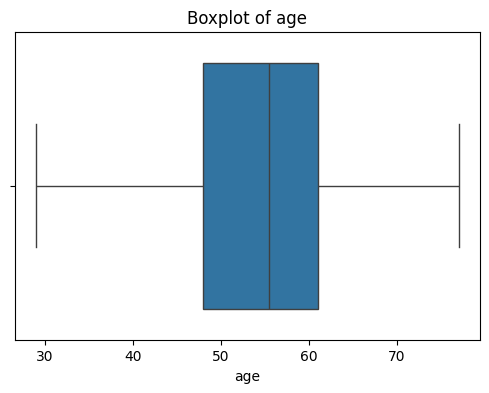

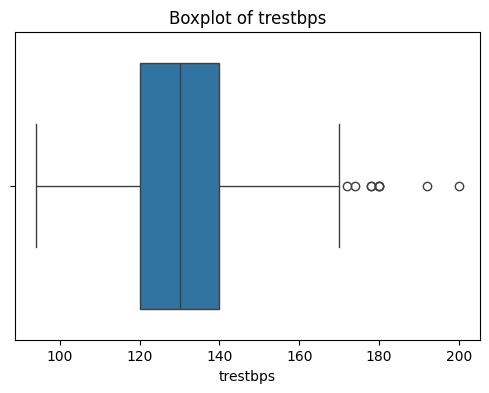

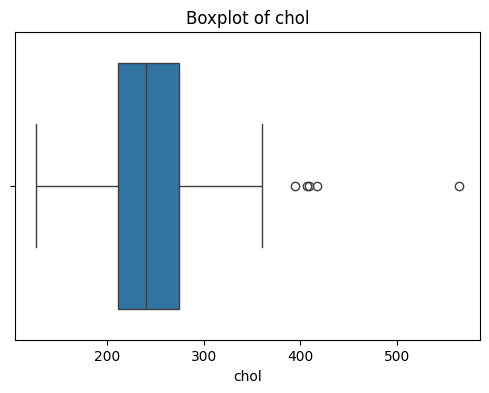

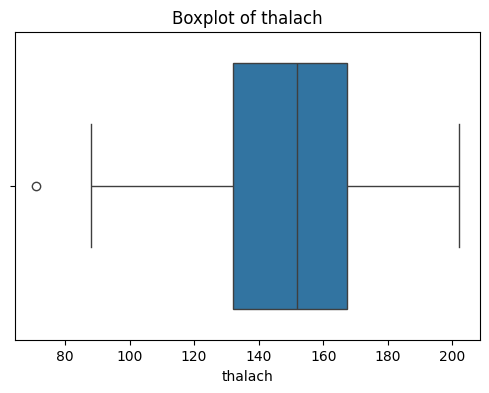

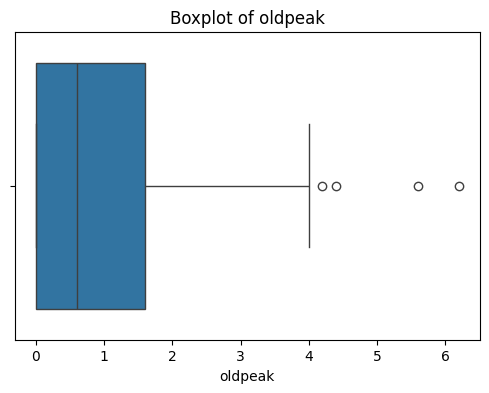

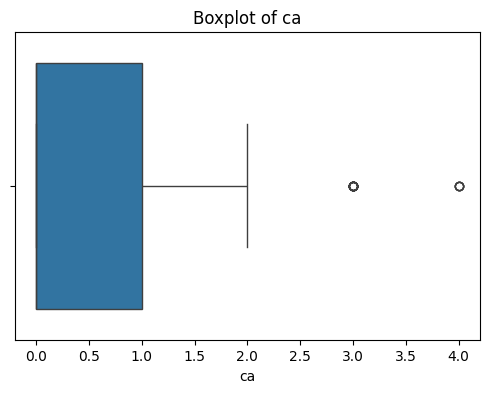

In [30]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

    # IQR Method to remove outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

In [ ]:
sns.pairplot(df[['age', 'thalach', 'chol', 'oldpeak', 'target']], hue='target')
plt.show()

In [ ]:
print("EDA Completed. Dataset shape after cleaning:", df.shape)